In [113]:
#Importing required Modules
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import random

#  Simple Cross Validation (Train_Test_Split)


In [106]:
def train_test_split(xArray, yArray, ratio=0.7):
    len_range=np.arange(len(xArray))
    if len(xArray)==len(yArray)==len(len_range):
        train_index=random.sample(list(len_range),k=int(ratio*len(len_range)))
        xTrain=[]
        yTrain=[]
        xTest=[]
        yTest=[]          
        for indexes in len_range:
            if indexes not in train_index:
                xTest.append(xArray[indexes])
                yTest.append(yArray[indexes])
            else:
                xTrain.append(xArray[indexes])
                yTrain.append(yArray[indexes])
    return np.array(xTrain), np.array(xTest), np.array(yTrain), np.array(yTest)

# Mathematics behind Linear Regression

<font size= "3">Before diving into the code, we must know the meaning and mathematical intuition behind a simple linear regression which involves only one independent variable and one dependent variable. Linear Regression is a statistical technique of finding the best fit line in a dataset. Here, best fit line means the line which gives a certain level of approximation of how the independent variable is changing with the dependent variable. That's it!!</font>


<font size= "3.5">There are infinite numbers of line, which can represent the change of independent variable with the dependent one, but we need to find a line which is the most accurate one. To do so, first we need to calculate the error in the lines we have selected, and then the line with the least amount of error is the best fit line. To calculate amount of errors there are different measures, but the most preferred one for a linear regression problem is the '<b>Mean Squared Error</b>'.<font>

<font size="3">Firstly, let's assume a hypothesis function for our best fit line,  ŷ<sub>i</sub> = mx<sub>i</sub> + b <br>
Here, ŷ<sub>i</sub> is our prediction of dependent variable, x<sub>i</sub>  is our independent variable, 'm' is the slope of our hypothesis line and 'b' is the y-intercept</font>

<font size=3>If 'y<sub>i</sub>' is the correct value of dependent variable which is dependent on x<sub>i</sub> and ŷ<sub>i</sub> is the predicted value by our hypothesis, the Mean Squared Error (M.S.E) value for our hypothesis ŷ<sub>i</sub> = mx<sub>i</sub> + b  will be:</font>

<img src="MSE_LR.png">

<font size="3">Let's factorise the <b>M.S.E</b> or cost function which will help us later.<br><br><b>NOTE THIS BEFORE JUMPING INTO FACTORISATION:<br></b><br>1. <font size="5">  &Sigma;x<sub>i</sub> = n x&#772;<span>............</span></font><math>(x<sub>1</sub>+ x<sub>2</sub>+ x<sub>3</sub>+ ...+ x<sub>n</sub>)/ n = x&#772;</math><br>2. <font size="5"> ŷ<sub>i</sub> = mx<sub>i</sub> + b</font> </font>

<img src="MSE_LR_factorization.jpg" width='800'>

<font size="3">We have the mean squared error for our hypothesis line which depends on the slope (m) and y-intercept (b). To get the minimum possible M.S.E the value of slope and y-intercept should be adjusted perfectly. To determine which values of slope and y-intercept has the minimum error, we have to find the local minima of the cost function which depends on 'm' and 'b'. To do so, we have to partially differentiate the M.S.E (cost function) with respect to slope (m) and y-intercept (b). As the M.S.E function has the derivate, 0 at its local minima (in this case, the global minima), we can write:</font>

<img src="partial_differentiation_zero.jpg" width='500'>

<font size='3'>So, first let's differentiate the cost function with respect to the y-intercept</font>

<img src="partial_diff_wrt_b.jpg" width='700'>

<font size='3'>Now, from above remember that <b> b= y&#772; - m x&#772;</b>, we will substitute this value of 'b' after differentiating M.S.E w.r.t slope 'm' below. So, let's differentiate. </font>

<img src="partial_diff_wrt_m.jpg" width='700'>

<font size='3'>Now, we got the values of both slope and y-intercept for our hypothesis function which optimally minimizes the mean squared error. But most of the people including me prefer to write slope 'm' as:</font>

<img src="slope_another_form.jpg" width='700'>

<font size='3'>Both of the forms are same, you can write any of the forms according to your wish but I personally like to write the later one because it directly involves the correlation coeffecient. Here is the proof that proves both of the forms are same</font>

<img src="both_forms_m.jpg" width="600">

# Simple Linear Regression From Scratch

In [204]:
class simple_LR():
    def fit(self, X_train, Y_train):
        numerator, denominator=0, 0
        for i in range(np.shape(X_train)[0]):
            numerator += numerator + (X_train[i]-X_train.mean())*(Y_train[i]-Y_train.mean())
            denominator += denominator + (X_train[i]-X_train.mean())**2
        self.m = numerator/denominator
        self.b = Y_train.mean() - self.m*X_train.mean()
        
    def predict(self, x_value):
        return (self.m)*x_value + self.b
    
    def mse(self, Y_train, Y_pred):
        return sum(((Y_pred-Y_train)**2))/len(Y_train)
        

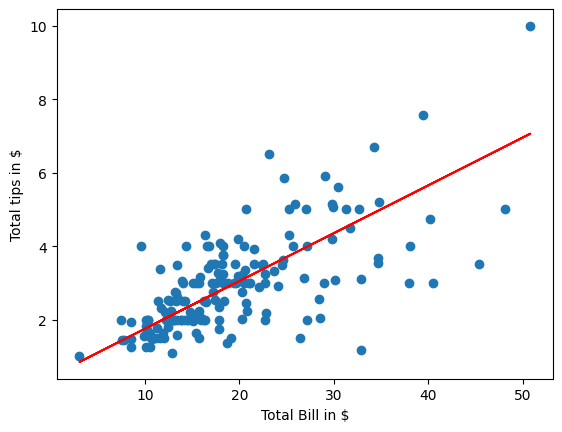

In [206]:
#Creating some sample datasets to test
df=sns.load_dataset('tips')
X_values=df['total_bill'].values
Y_values=df['tip'].values
X_train,X_test,y_train, y_test=train_test_split(X_values, Y_values)
plt.scatter(X_train, y_train)
plt.xlabel('Total Bill in $')
plt.ylabel('Total tips in $')

#Creating a regressor using simple_LR() 
regressor=simple_LR()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)

#Plotting the regression line
plt.plot(X_train, y_pred, color='red')

In [211]:
# Checking the Mean Square Error 
regressor.mse(y_train, y_pred)

0.9775839958947075